# quant-econ Solutions: Julia Essentials

Solutions for http://quant-econ.net/jl/julia_essentials.html

## Exercise 1

#### Part 1 solution:

Here's one possible solution

In [1]:
x_vals = [1, 2, 3]
y_vals = [1, 1, 1]
sum([x * y for (x, y) in zip(x_vals, y_vals)])

6

#### Part 2 solution:

One solution is

In [2]:
sum([x % 2 == 0 for x in 0:99])

50

This also works

In [3]:
sum(map(x -> x % 2 == 0, 0:99))

50

#### Part 3 solution

Here's one possibility

In [4]:
pairs = ((2, 5), (4, 2), (9, 8), (12, 10))
sum([(x % 2 == 0) & (y % 2 == 0) for (x, y) in pairs])

2

## Exercise 2

In [9]:
p(x, coeff) = sum([a * x^(i-1) for (i, a) in enumerate(coeff)])


p (generic function with 1 method)

In [10]:
p(1, (2, 4))

6

## Exercise 3

Here's one solution:

In [23]:
function f(string)
    count = 0
    for letter in string
        if (letter == uppercase(letter)) & isalpha(letter)
            count += 1
        end
    end
    return count
end
    
f("The Rain in Spain")

3

## Exercise 4

Here's a solution:

In [26]:
function f(seq_a, seq_b)
    is_subset = true
    for a in seq_a
        if !(a in seq_b)
            is_subset = false
        end
    end
    return is_subset
end

# == test == #

println(f([1, 2], [1, 2, 3]))
println(f([1, 2, 3], [1, 2]))

true
false


If we use the `Set` data type then the solution is easier

In [29]:
f(seq_a, seq_b) = issubset(Set(seq_a), Set(seq_b))

println(f([1, 2], [1, 2, 3]))
println(f([1, 2, 3], [1, 2]))

true
false


## Exercise 5

In [30]:
function linapprox(f, a, b, n, x)
    #=
    Evaluates the piecewise linear interpolant of f at x on the interval 
    [a, b], with n evenly spaced grid points.

    =#
    length_of_interval = b - a
    num_subintervals = n - 1
    step = length_of_interval / num_subintervals  

    # === find first grid point larger than x === #
    point = a
    while point <= x
        point += step
    end
    
    # === x must lie between the gridpoints (point - step) and point === #
    u, v = point - step, point  

    return f(u) + (x - u) * (f(v) - f(u)) / (v - u)
end


linapprox (generic function with 1 method)

Let's test it

In [39]:
f(x) = x^2
g(x) = linapprox(f, -1, 1, 3, x)

g (generic function with 1 method)

In [40]:
using PyPlot

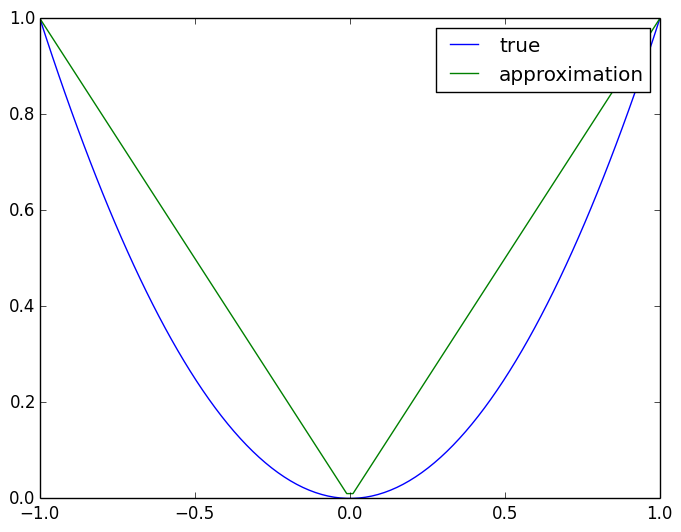

PyObject <matplotlib.legend.Legend object at 0x7f25a0f8d0d0>

In [44]:
x_grid = linspace(-1, 1, 100)
y_vals = map(f, x_grid)
y_approx = map(g, x_grid)
plot(x_grid, y_vals, label="true")
plot(x_grid, y_approx, label="approximation")
legend()

## Exercise 6

In [2]:
f = open("us_cities.txt", "r")
total_pop = 0
for line in eachline(f)
    city, population = split(line, ':')            # Tuple unpacking
    total_pop += int(population)
end
close(f)
println("Total population = $total_pop")

Total population = 23831986
